# DBSCAN

<br> 

Throughout this notebook, the DBSCAN model will be implemented on both the Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: Zero](#23)
    * [Modelling Original](#23.1)
        * [Zero: DBSCAN](#M4)
        * [Zero Visualisation](#N0)
* [Modelling Nonzero Data](#NN)
    * [Elbow & Silhoutte: Nonzero](#MU) 
        * [Nonzero: DBSCAN](#M9)
        * [Nonzero Visualisation](#N00)
<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM
from hdbscan import HDBSCAN

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/final_zero.csv')
final_zero.drop(columns=['Unnamed: 0'], inplace=True)
tra_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/tra_zero.csv')
tra_zero.drop(columns=['Unnamed: 0'], inplace=True)
zero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/zero_df.csv')
zero_df.drop(columns=['Unnamed: 0'], inplace=True)

# Import the nonzero dataset 

final_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/final_nonzero.csv')
final_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
tra_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/tra_nonzero.csv')
tra_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
nonzero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/nonzero_df.csv')
nonzero_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
final_zero.head(1)

volume_firm  liabilities_firm  bank_liabilities  other_liabilities  \
0    -0.919737         -1.221589          -1.39815          -0.213653   

         pl  banking_products  new_active_cc  new_passive_cc  \
0 -0.611916         -0.341303      -0.432425        -0.13513   

   new_commission_income  legal  p_membership  p_KK  p_fixeddeposits  \
0              -0.181772   16.0           1.0   1.0              1.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_unionfunds  \
0                  0.0                 0.0   0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank   work  year  risk  \
0                0.0         0.0          0.0         0.0  208.0  13.0   1.0   

   postcode  
0      32.0

In [5]:
tra_zero.head(1)

client_type  legal  branch  volume_firm  liabilities_firm  liabilities  \
0          0.0   16.0    10.0    10.103612          9.181565          0.0   

   bank_liabilities  other_liabilities    pl_firm         pl  \
0               0.0         -11.512925  12.735183  14.697371   

   banking_products  other_products  p_membership  p_KK  p_creditcard  \
0               0.0             0.0           1.0   1.0           0.0   

   p_bankloans  p_fixeddeposits  p_WP2Depot  p_propertyinsurance  \
0          1.0              1.0         0.0                  0.0   

   p_companyinsurance  p_DZ  p_DZP  p_unionfunds  p_buildingsavings  \
0                 0.0   0.0    0.0           0.0                0.0   

   p_mortgage  p_VRleasing  p_teambank  new_active_cc  new_passive_cc  \
0         0.0          0.0         0.0           -0.0        0.050022   

   new_commission_income  new_cmib   work  year  risk  postcode  size  
0              26.431755  3.856511  208.0  13.0   1.0      32.0   1.0

In [6]:
zero_df.head(1)

client_type  legal  branch  volume_firm  volume  loans_approved  \
0          0.0   16.0    10.0     31792.82     0.0             0.0   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0             0.0           6103.29          0.0               0.0   

   other_liabilities   pl_firm         pl  banking_products  other_products  \
0                0.0  47870.67  11518.478               0.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           1.0   1.0           0.0          1.0              1.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0            0.0   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            0.05                  47.25      47.3  208.0  13.0   1.0   

   postcode  size  
0      32.0   1.0

In [7]:
final_nonzero.head(1)

loans_approved  bank_liabilities  other_liabilities        pl  \
0       -0.428154          -0.57338          -0.426741 -1.530136   

   banking_products  new_active_cc  new_commission_income  client_type  legal  \
0         -0.458714       0.300147              -0.464326          0.0   39.0   

   p_membership  p_KK  p_creditcard  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_mortgage  p_VRleasing  \
0                  0.0                 0.0   0.0         0.0          0.0   

   p_teambank   work  year  risk  postcode  
0         0.0  393.0  11.0   0.0      46.0

In [8]:
tra_nonzero.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     8.333568  7.697297         9.93363   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0       10.883836          7.523551    10.231201           9.80453   

   other_liabilities   pl_firm        pl  banking_products  other_products  \
0               -0.0  7.444261  9.518547               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0       5.180153   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0          2.5096              13.890309  5.466413  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

In [9]:
nonzero_df.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     12988.79  12988.79        12988.79   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0        12988.79            748.17       748.17            748.17   

   other_liabilities  pl_firm       pl  banking_products  other_products  \
0                0.0  7388.77  7388.77               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0         177.71   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            12.3                   46.6    236.61  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

## Model Definition

In [10]:
# # We define the models we are interested in set the parameters to evaluate the GOF

# ce_dbscan = clusteval(cluster='dbscan', metric='euclidean', max_clust=20)

<br>

## Elbow & Silhoutte: Zero  <a class="anchor" id="23"></a>

For the visualisations we use a package called clusteval which easily computes and depicts the measurements of goodness of fit (GOF) for the models.
<br>

**Zero Data-Set**

In [11]:
# # we create an array based on the dataset

# numpy_arr_1 = final_zero.to_numpy()

In [12]:
# # Fit the array to find optimal number of clusters

# ce_dbscan.fit(numpy_arr_1)

# # Make plot of the silhouette

# ce_dbscan.plot()

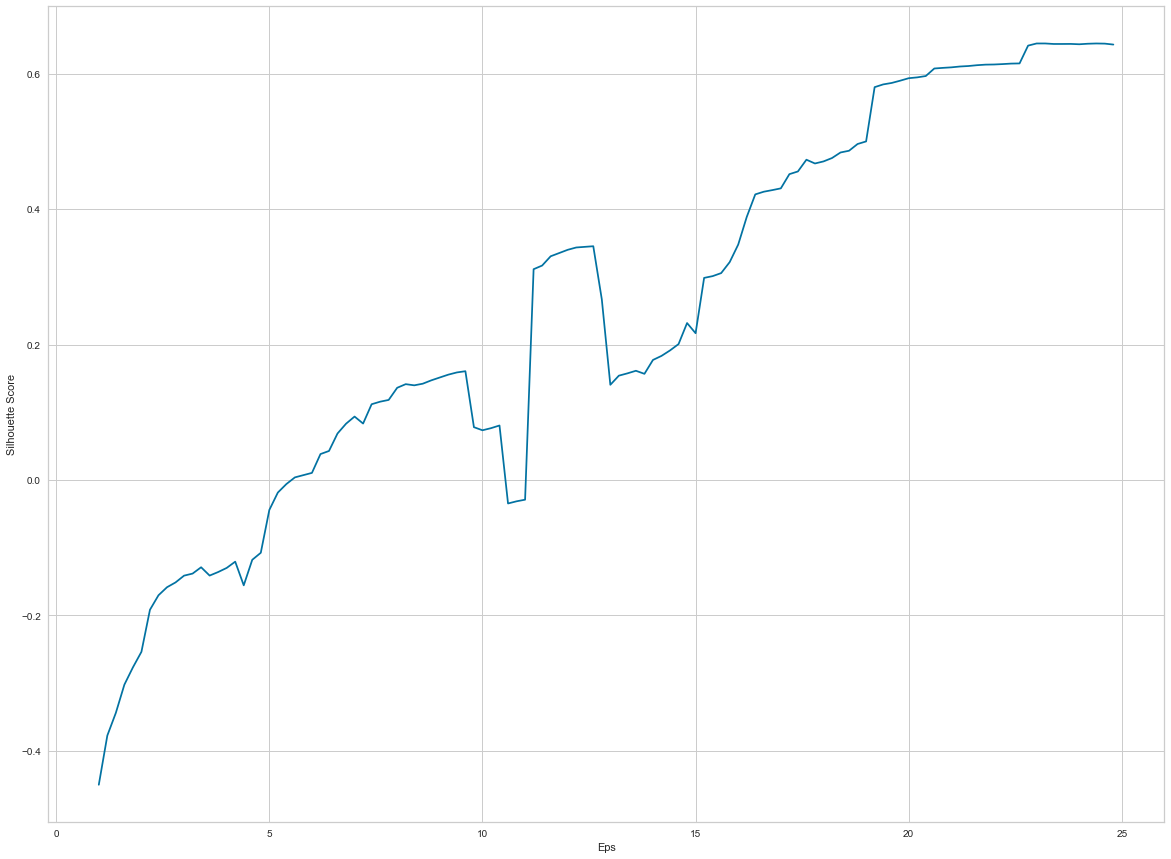

In [29]:
plt.figure(figsize=(20,15))

results = {}

for i in np.arange(1, 25, 0.2):
    m = DBSCAN(eps=i, min_samples= 90, metric= 'euclidean')
    labels = m.fit(final_zero)
    sil_index = silhouette_score(final_zero, labels.labels_)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.show()

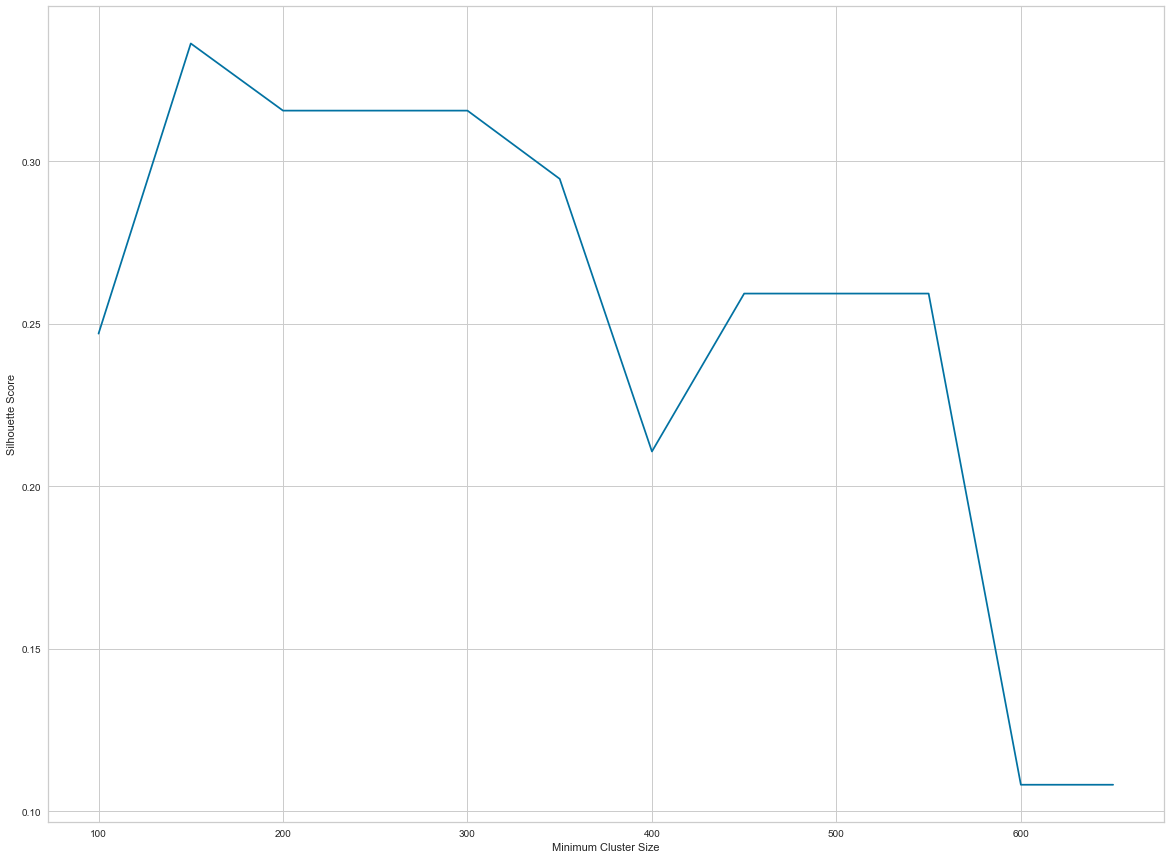

In [35]:
plt.figure(figsize=(20,15))

results = {}

for i in range(100, 700, 50):
    m = HDBSCAN(algorithm='best', alpha=1.8, leaf_size=10,
                            metric='euclidean', min_cluster_size=i, 
                            min_samples=50, cluster_selection_method = 'leaf')
    labels = m.fit(final_zero)
    sil_index = silhouette_score(final_zero, labels.labels_)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Minimum Cluster Size")
plt.ylabel("Silhouette Score")
plt.show()

## Modeling Zero Data  <a class="anchor" id="22.3"></a>

Throughout this section we will try to implement a DBSCAN approach on the original dataset.

###  Zero

In [15]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#### DBSCAN  <a class="anchor" id="M4"></a>

In [16]:
# we set the function for DBSCAN with euclidean distance

db = DBSCAN(eps = 19, min_samples = 90, metric ='euclidean', n_jobs =1)

hdb = HDBSCAN(algorithm='best', alpha=1.8, leaf_size=10,
                            metric='euclidean', min_cluster_size=320, 
                            min_samples=50, cluster_selection_method = 'leaf')

# Fit the function to the original nonzero dataset

db.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_DBSCAN'] = db.labels_
tra_zero['Cluster_DBSCAN'] = db.labels_

zero_df["Cluster_DBSCAN"] = db.labels_

print('Distribution of Clusters: \n')
print(zero_df['Cluster_DBSCAN'].value_counts())
print('\n')

# Fit the function to the original nonzero dataset
 
hdb.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_HDBSCAN'] = hdb.labels_
tra_zero['Cluster_HDBSCAN'] = hdb.labels_

print('Distribution of Clusters: \n')
print(final_zero['Cluster_HDBSCAN'].value_counts())

Distribution of Clusters: 

 1    3698
 2     427
 0     425
-1     376
 3     152
 4     108
Name: Cluster_DBSCAN, dtype: int64


Distribution of Clusters: 

-1    1409
 6    1187
 2     556
 5     541
 4     408
 1     406
 0     356
 3     323
Name: Cluster_HDBSCAN, dtype: int64


In [17]:
print('The performance scores are the following: \n' )
print('DBSCAN:')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_DBSCAN"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_DBSCAN"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_DBSCAN"])))
print('\n')
print('HDBSCAN:')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_HDBSCAN"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_HDBSCAN"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_HDBSCAN"])))

The performance scores are the following: 

DBSCAN:
Silhouette: 0.5023464843830727
Calinski Harabasz: 6143.043557042148
Davies Bouldin: 1.074546977991819


HDBSCAN:
Silhouette: 0.2699002428323057
Calinski Harabasz: 2575.3781167557618
Davies Bouldin: 1.6909148607787683


## Zero Visualisation <a class="anchor" id="N0"></a>

In [18]:
tt = tra_zero.drop(columns=['Cluster_DBSCAN', 'Cluster_HDBSCAN'])

PCs_1d = pd.DataFrame(pca_1d.fit_transform(tt))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')



cluster0_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == -1]
cluster1_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 0]
cluster2_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 1]
cluster3_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 2]
cluster4_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 3]
cluster5_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 4]

In [19]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_d["PC1_2d"],
                    y = cluster0_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_d["PC1_2d"],
                    y = cluster1_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_d["PC1_2d"],
                    y = cluster2_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_d["PC1_2d"],
                    y = cluster3_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_d["PC1_2d"],
                    y = cluster4_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'beige'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_d["PC1_2d"],
                    y = cluster5_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)


In [20]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_d["PC1_3d"],
                    y = cluster0_d["PC2_3d"],
                    z = cluster0_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_d["PC1_3d"],
                    y = cluster1_d["PC2_3d"],
                    z = cluster1_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_d["PC1_3d"],
                    y = cluster2_d["PC2_3d"],
                    z = cluster2_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_d["PC1_3d"],
                    y = cluster3_d["PC2_3d"],
                    z = cluster3_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_d["PC1_3d"],
                    y = cluster4_d["PC2_3d"],
                    z = cluster4_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'beige'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_d["PC1_3d"],
                    y = cluster5_d["PC2_3d"],
                    z = cluster5_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

###  Non-Zero <a class="anchor" id="NN"></a>

## Elbow & Silhoutte <a class="anchor" id="MU"></a>

In [21]:
# # we create an array based on the dataset

# numpy_arr_2 = final_nonzero.to_numpy()

# # Fit the array to find optimal number of clusters

# ce_dbscan.fit(numpy_arr_2)

# # Make plot of the silhouette

# ce_dbscan.plot()


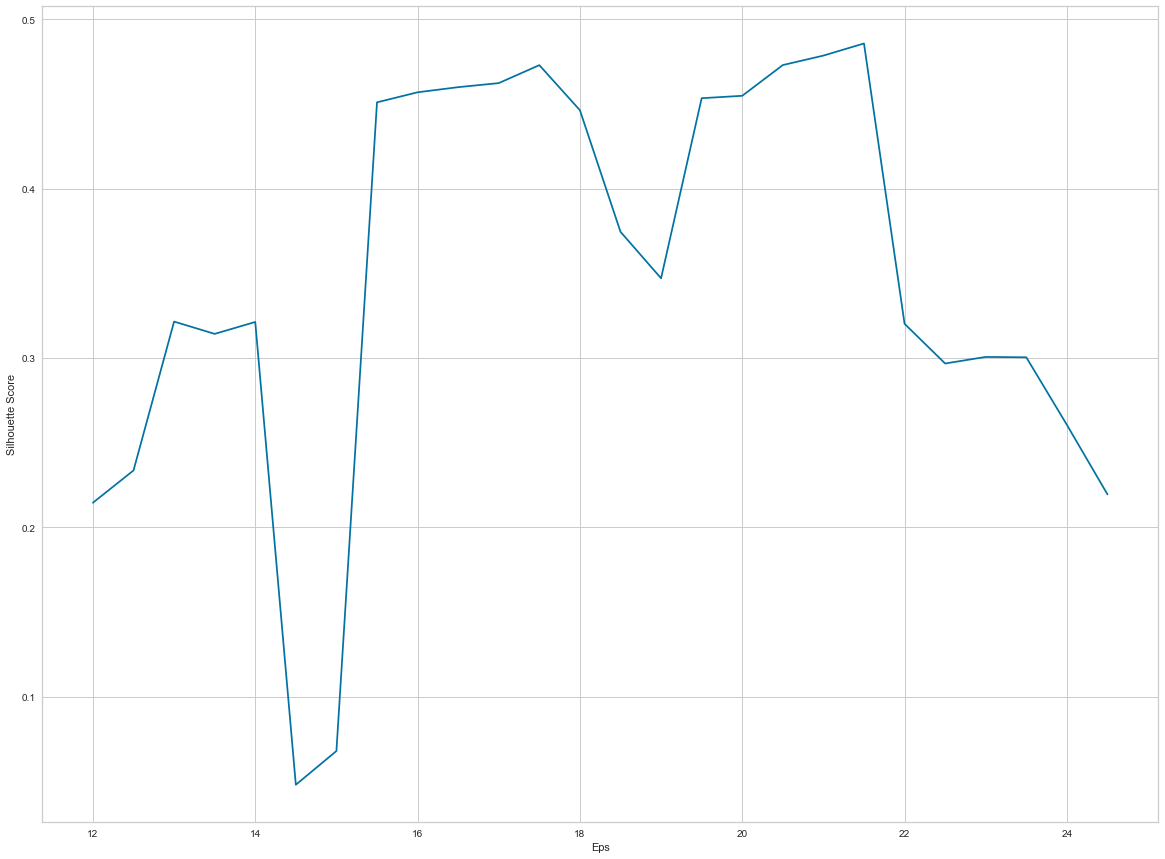

In [31]:
plt.figure(figsize=(20,15))

results = {}

for i in np.arange(12, 25, 0.5):
    m = DBSCAN(eps=i, min_samples= 150, metric= 'euclidean')
    labels = m.fit(final_nonzero)
    sil_index = silhouette_score(final_nonzero, labels.labels_)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.show()

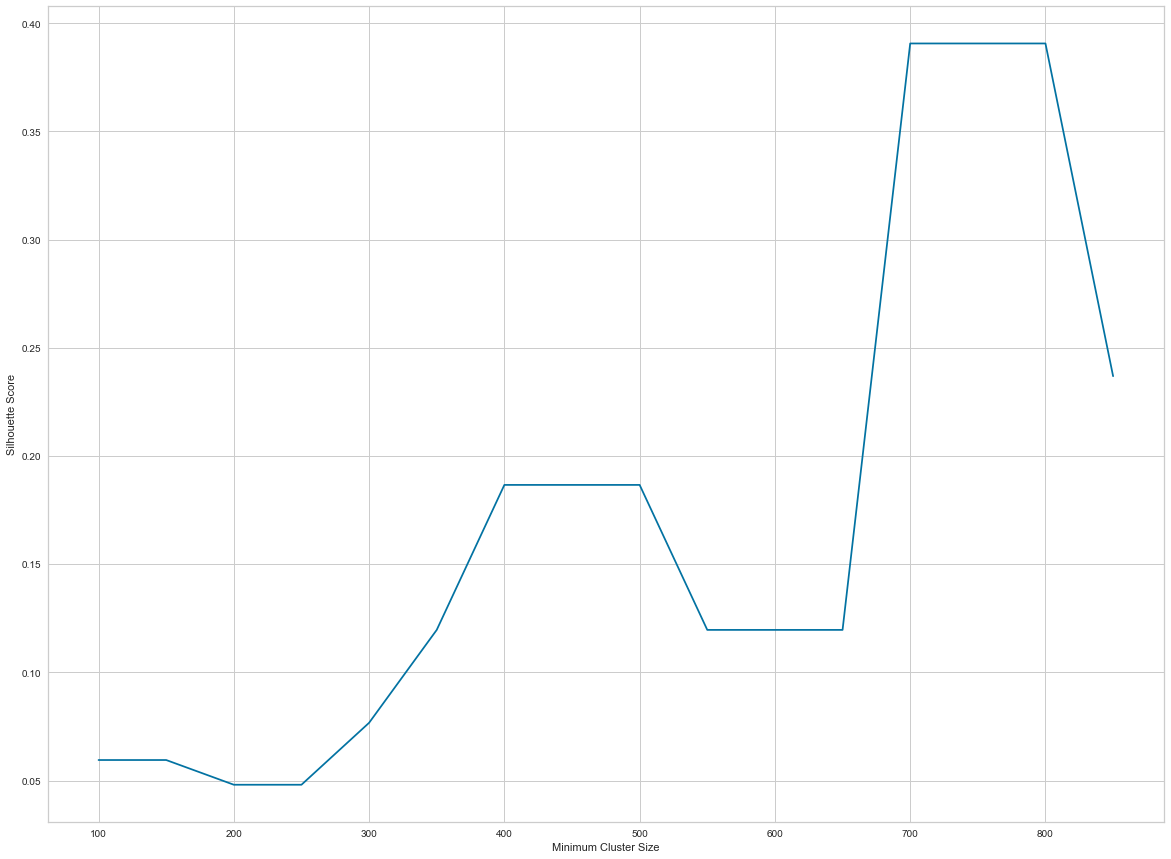

In [32]:
plt.figure(figsize=(20,15))

results = {}

for i in range(100, 900, 50):
    m = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=800,
                      metric='euclidean', min_cluster_size=i, 
                      min_samples=200, cluster_selection_method = 'eom')
    labels = m.fit(final_nonzero)
    sil_index = silhouette_score(final_nonzero, labels.labels_)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Minimum Cluster Size")
plt.ylabel("Silhouette Score")
plt.show()

#### DBSCAN  <a class="anchor" id="M9"></a>

In [24]:
# we set the function for DBSCAN with euclidean distance

db_nonzero = DBSCAN(eps= 17.8, min_samples= 150, metric= 'euclidean')

hdb_nonzero = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=800,
                      metric='euclidean', min_cluster_size=800, 
                      min_samples=200, cluster_selection_method = 'eom')

# Fit the function to the original nonzero dataset

db_nonzero.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_DBSCAN'] = db_nonzero.labels_
tra_nonzero['Cluster_DBSCAN'] = db_nonzero.labels_

nonzero_df["Cluster_DBSCAN"] = db_nonzero.labels_
print('Distribution of Clusters: \n')
print(nonzero_df['Cluster_DBSCAN'].value_counts())

# Fit the function to the original nonzero dataset
 
hdb_nonzero.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_HDBSCAN'] = hdb_nonzero.labels_
tra_nonzero['Cluster_HDBSCAN'] = hdb_nonzero.labels_

print('Distribution of Clusters: \n')
print(final_nonzero['Cluster_HDBSCAN'].value_counts())

Distribution of Clusters: 

 0    9604
 2    2077
-1    1180
 3     687
 1     259
Name: Cluster_DBSCAN, dtype: int64
Distribution of Clusters: 

 1    8573
-1    2340
 2    1924
 0     970
Name: Cluster_HDBSCAN, dtype: int64


In [25]:
print('The performance scores are the following: \n' )
print('DBSCAN:')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_DBSCAN"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_DBSCAN"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_DBSCAN"])))
print('\n' )
print('HDBSCAN:')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_HDBSCAN"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_HDBSCAN"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_HDBSCAN"])))

The performance scores are the following: 

DBSCAN:
Silhouette: 0.48072453971483764
Calinski Harabasz: 14688.125477823243
Davies Bouldin: 0.7437791950741728


HDBSCAN:
Silhouette: 0.39085656219183723
Calinski Harabasz: 10898.97301746287
Davies Bouldin: 3.7464436993367043


## Nonzero Visualisation <a class="anchor" id="N00"></a>

In [26]:
nn = tra_nonzero.drop(columns=['Cluster_DBSCAN', 'Cluster_HDBSCAN'])

PCs_1d_n = pd.DataFrame(pca_1d.fit_transform(nn))

PCs_2d_n = pd.DataFrame(pca_2d.fit_transform(nn))

PCs_3d_n = pd.DataFrame(pca_3d.fit_transform(nn))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d_n.columns = ["PC1_1d"]

PCs_2d_n.columns = ["PC1_2d", "PC2_2d"]

PCs_3d_n.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_1d_n,PCs_2d_n,PCs_3d_n], axis=1, join='inner')



cluster0_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == -1]
cluster1_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 0]
cluster2_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 1]
cluster3_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 2]
cluster4_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 3]

In [27]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_nd["PC1_2d"],
                    y = cluster0_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_nd["PC1_2d"],
                    y = cluster1_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_nd["PC1_2d"],
                    y = cluster2_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_nd["PC1_2d"],
                    y = cluster3_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_nd["PC1_2d"],
                    y = cluster4_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'beige'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [28]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_nd["PC1_3d"],
                    y = cluster0_nd["PC2_3d"],
                    z = cluster0_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_nd["PC1_3d"],
                    y = cluster1_nd["PC2_3d"],
                    z = cluster1_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_nd["PC1_3d"],
                    y = cluster2_nd["PC2_3d"],
                    z = cluster2_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_nd["PC1_3d"],
                    y = cluster3_nd["PC2_3d"],
                    z = cluster3_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_nd["PC1_3d"],
                    y = cluster4_nd["PC2_3d"],
                    z = cluster4_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)